<a href="https://colab.research.google.com/github/Isaac0219/Dispertion/blob/main/Schwarchild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para esto primero vamos a calcular el $u_c$ para cada parámetro de impacto

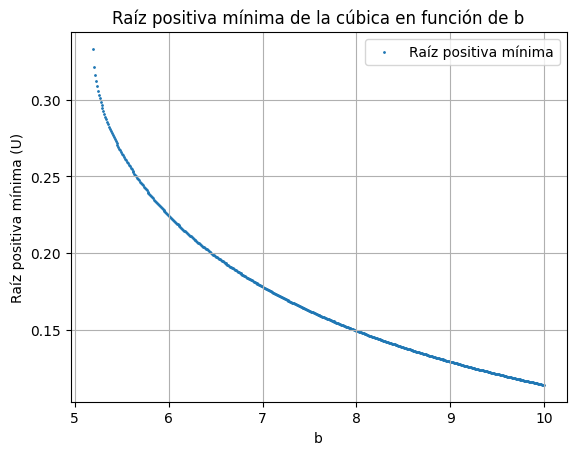

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los coeficientes de la cúbica
def coeficientes_cubica(b, m):
    # Ecuación: -2*m*b^2*u^3 + b^2*u^2 + 0*u - 1 = 0
    return [-2 * m * b**2, b**2, 0, -1]

# Parámetros
m = 1
inicio = 3 * (3**(1/2)) * m
fin = 10 * m
paso = 0.01
valores_b = np.arange(inicio, fin, paso)


# Lista para almacenar las raíces positivas más pequeñas
valores_U_minima = []

#Para cada valor de se resuelve ecuacion cubica para u
for b in valores_b:
    coefs = coeficientes_cubica(b, m)
    # Encontrar todas las raíces (reales y complejas)
    raices = np.roots(coefs)
    # Filtrar raíces reales positivas
    raices_reales_positivas = raices[np.isreal(raices) & (raices.real > 0)].real
    # Seleccionar la raíz positiva más pequeña si existe
    if len(raices_reales_positivas) > 0:
        raiz_minima = min(raices_reales_positivas)
        valores_U_minima.append(raiz_minima)
    else:
        # Si no hay raíces positivas, agregar NaN
        valores_U_minima.append(np.nan)

# Graficar los resultados
valores_U_minima = np.array(valores_U_minima)
plt.scatter(valores_b, valores_U_minima, label="Raíz positiva mínima", s=1)
plt.xlabel("b")
plt.ylabel("Raíz positiva mínima (U)")
plt.title("Raíz positiva mínima de la cúbica en función de b")
plt.legend()
plt.grid()
plt.show()


0 a 100 y de 0.01 para las b's o hacer mas grande el rango

Ya con los valores de $U_c$ para cada $b$, podemos calcular la integral

<ipython-input-3-b2c87f136a2a>:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_result, _ = quad(integrando, 0, u_m, args=(b, m))


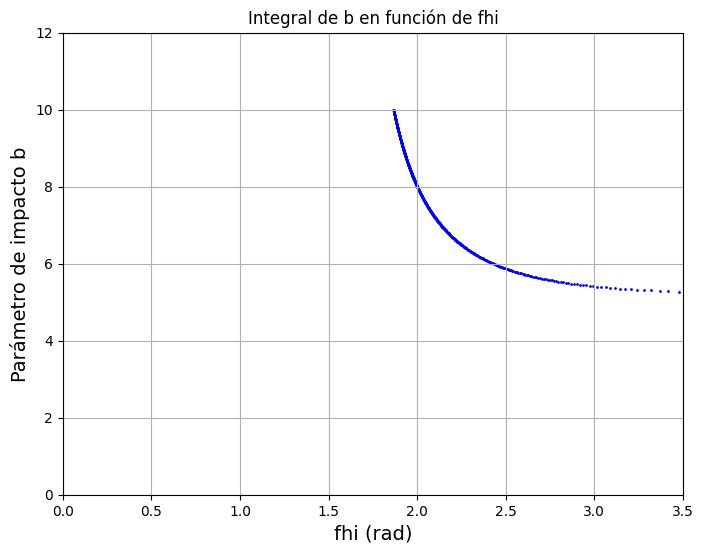

In [3]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Este es el integrando
def integrando(u, b, m):
    un = 1 / (b**2) - (u**2) * (1 - 2 * m * u)
    #para evitar que salgan imaginarios en la raiz
    if un <= 0:
        return 0
    return 1 / np.sqrt(un)

# Función para calcular la integral
def fhi_b_corrected(b, u_m, m):
    try:
        # Realizar la integración
        integral_result, _ = quad(integrando, 0, u_m, args=(b, m))
        return integral_result
    except Exception as e:
        print(f"Error durante la integración para b={b}: {e}")
        return np.nan  # Devuelve NaN si hay un error

# Parámetros
m = 1

#para cada valor de u critica y su b manda a llamar fhi_b_corrected osea calcula la integral
fhi_values = [fhi_b_corrected(b, valores_U_minima[i], m) for i, b in enumerate(valores_b)]

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(fhi_values,valores_b, color='blue', s=1)
plt.ylabel("Parámetro de impacto b", fontsize=14)
plt.xlabel("fhi (rad)", fontsize=14)
plt.grid(True)
plt.xlim(0, 3.5)
plt.ylim(0, 12)  # Ajustar el límite superior del eje y para una mejor visualización
plt.title("Integral de b en función de fhi")
plt.show()


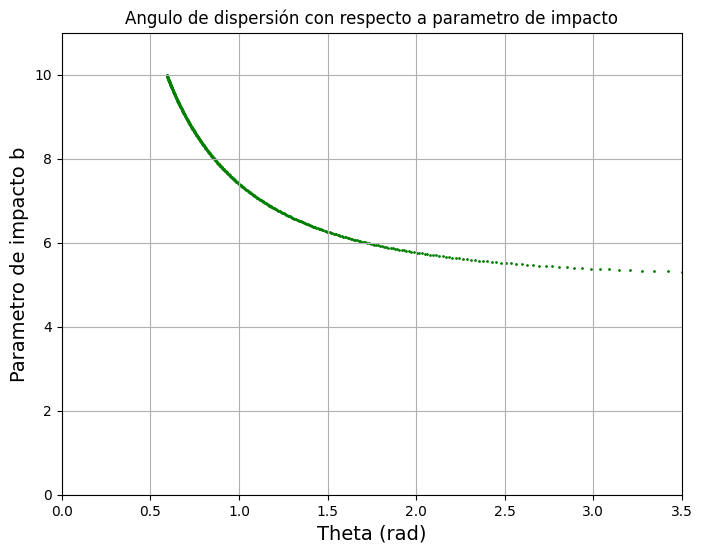

In [4]:
#CALCULO DE THETA=2phi-pi
theta_values = 2 * np.array(fhi_values) - np.pi

plt.figure(figsize=(8, 6))
plt.scatter(theta_values, valores_b, color='green', s=1)
plt.ylabel("Parametro de impacto b", fontsize=14)
plt.xlabel("Theta (rad)", fontsize=14)
plt.grid(True)
plt.xlim(0, 3.5)
plt.ylim(0, 11)
plt.title("Angulo de dispersión con respecto a parametro de impacto")
plt.show()


In [5]:
from scipy.interpolate import CubicSpline

def vel(theta_chica, b_values):
    # Asegurarse de que theta_chica esté en orden ascendente
    indices_ordenados = np.argsort(theta_chica)
    theta_chica_ordenado = theta_chica[indices_ordenados]
    b_values_ordenado = b_values[indices_ordenados]

    # Ajustar spline cúbico
    spline = CubicSpline(theta_chica_ordenado, b_values_ordenado)

    # Derivar el spline
    derivada_spline = spline.derivative()

    # Calcular la derivada en los puntos de theta_chica
    derivada_b = derivada_spline(theta_chica_ordenado)

    # Graficar los resultados
    plt.figure(figsize=(10, 6))

    # Gráfico de la relación theta-b ajustada
    plt.subplot(2, 1, 1)
    plt.plot(theta_chica_ordenado, b_values_ordenado, 'o', label='Datos originales')
    plt.plot(theta_chica_ordenado, spline(theta_chica_ordenado), label='Spline ajustado')
    plt.xlabel('Theta chica')
    plt.ylabel('Parámetro de impacto b')
    plt.title('Ajuste spline cúbico')
    plt.legend()

    # Gráfico de la derivada filtrada por percentiles
    plt.subplot(2, 1, 2)
    plt.plot(theta_chica_ordenado, derivada_b, 'o', label='Derivada spline filtrada', color='green')
    plt.xlabel('Theta chica')
    plt.ylabel('Derivada de b respecto a theta')
    plt.title(f'Derivada del spline cúbico')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return theta_chica, b_values_ordenado, derivada_b

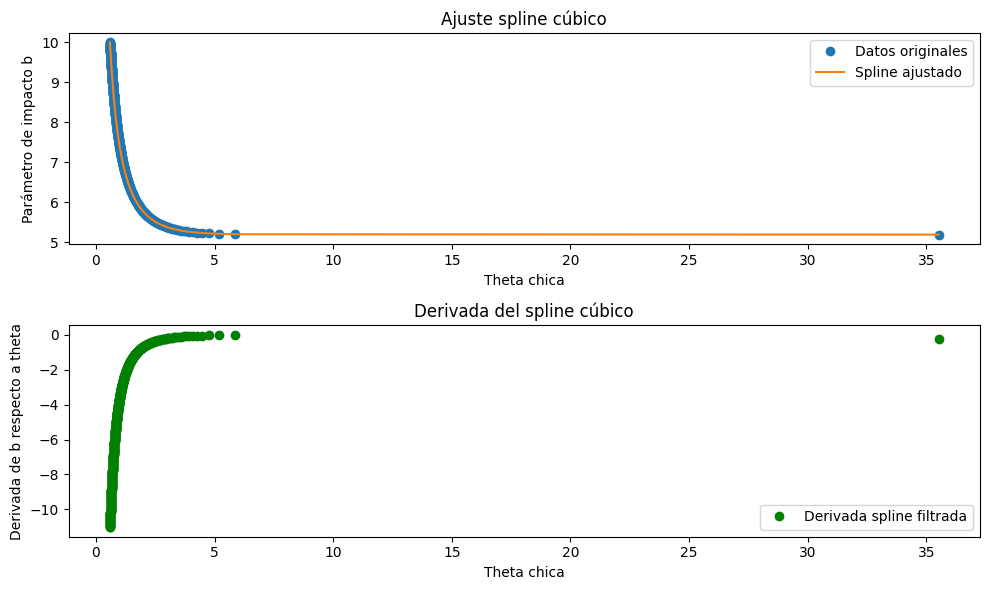

In [6]:
Theta_1, b_filtrado, derivada_b = vel(theta_values, valores_b)

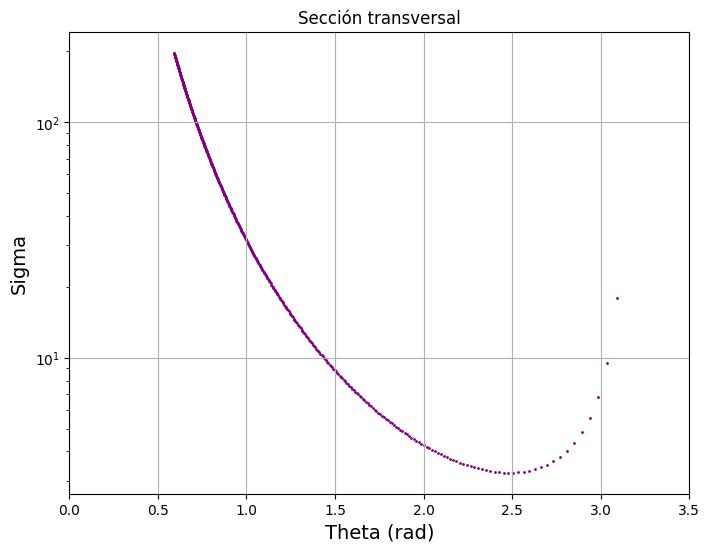

In [7]:
import matplotlib.pyplot as plt
#np.diff() calcula diferencia entre valores consecutivos del array de b y theta respect.
#se toman las primeras b's y theta's para sus diferencias y se hace i-1 veces porque va restando en pares
#np.abs para el absoluto y es es la razón de ambas diferencias
db_dtheta_values = np.abs(np.diff(valores_b) / np.diff(theta_values))

#array vacio para almacenar los sigmas
sigma_theta = []

#para i de 1 hasta la longitud del array de theta values: len(theta_values
for i in range(1, len(theta_values)):
    #para que no se indetermine
    if np.sin(theta_values[i]) != 0:
        #calculo de sigma(theta)
        sigma_value = (valores_b[i] / np.sin(theta_values[i])) * db_dtheta_values[i - 1]
        #se guarda valorsito en el array a llenar
        sigma_theta.append(sigma_value)
    #si seno(theta) da cero se establece sigma=0 para ese theta
    else:
        sigma_theta.append(0)

# Graficar sigma(theta) en función de theta
plt.figure(figsize=(8, 6))
# σ(θ) se calcula para las derivada, sigma no tiene un valor correspondiente en sigma_theta, y la primera entrada de sigma_theta corresponde a que se grafica a partir de theta_values[1:].
plt.scatter(theta_values[1:], sigma_theta, color='purple', s=1)  # Empezamos en 1 para alinear con db_dtheta_values
plt.yscale('log')
plt.xlabel("Theta (rad)", fontsize=14)
plt.ylabel("Sigma", fontsize=14)
plt.grid(True)
plt.xlim(0, 3.5)
plt.title("Sección transversal")
plt.show()


theta vs sigma en grados, recorrer a cero??? y intetnamos polinomios 13 ajuste

Ajuste grado trece

In [21]:
k = 0
theta_values_1 = []
b_values_1 = []
for i in range (len(theta_values)):
    if theta_values[i] <= np.pi:
      k = k+1
      theta_values_1.append(theta_values[i])
      b_values_1.append(valores_b[i])
theta_values_1 = np.array(theta_values_1)
b_values_1 = np.array(b_values_1)
err = np.zeros_like(theta_values_1)
for i in range(len(theta_values_1)):
    err[i] = 0.1
theta_values_1

array([3.08924622, 3.03559097, 2.98499318, 2.93713722, 2.89175374,
       2.8486111 , 2.80750862, 2.76827129, 2.73074559, 2.69479614,
       2.6603029 , 2.62715898, 2.59526876, 2.56454638, 2.53491447,
       2.50630302, 2.47864854, 2.45189321, 2.42598428, 2.40087347,
       2.37651648, 2.35287256, 2.32990417, 2.3075766 , 2.28585775,
       2.26471785, 2.24412921, 2.2240661 , 2.2045045 , 2.18542201,
       2.16679765, 2.14861179, 2.13084603, 2.11348307, 2.09650665,
       2.07990148, 2.06365312, 2.04774797, 2.03217316, 2.01691654,
       2.00196659, 1.98731242, 1.97294368, 1.95885056, 1.94502372,
       1.93145431, 1.91813387, 1.90505437, 1.89220815, 1.8795879 ,
       1.86718664, 1.85499772, 1.84301475, 1.83123166, 1.8196426 ,
       1.808242  , 1.7970245 , 1.78598497, 1.77511849, 1.76442033,
       1.75388596, 1.74351102, 1.7332913 , 1.72322279, 1.7133016 ,
       1.703524  , 1.69388637, 1.68438526, 1.67501732, 1.66577932,
       1.65666816, 1.64768082, 1.63881441, 1.63006611, 1.62143

In [17]:
def calcular_coeficientes(x, y, err, grad):
    n = grad
    A = np.zeros((n, n))
    b = np.zeros(n)

    for i in range(n):
        for j in range(n):
            A[i, j] = 2*np.sum((x**(i+j))/err)


        b[i] = 2 * np.sum((y * x**i)/err)

    coef = np.linalg.solve(A, b)
    return coef


def evaluar_polinomio(coeficientes, x):
    y = np.zeros_like(x)
    for i in range(len(coeficientes)):
        y += coeficientes[i] * (x ** i)
    return y


coef = calcular_coeficientes(theta_values_1, b_values_1,err,13)
coef

array([ 3.74125496e+01, -1.29489076e+02,  2.81876366e+02, -3.87406578e+02,
        3.47886277e+02, -1.98982524e+02,  6.14694861e+01,  9.70126133e-01,
       -9.95763758e+00,  4.54886244e+00, -1.04893551e+00,  1.28836811e-01,
       -6.71210717e-03])

In [23]:
x_1 = np.linspace(np.min(theta_values_1),np.max(theta_values_1),10000)
y_1 = evaluar_polinomio(coef,x_1)
x_1

array([0.59074492, 0.59099479, 0.59124467, ..., 3.08874647, 3.08899635,
       3.08924622])

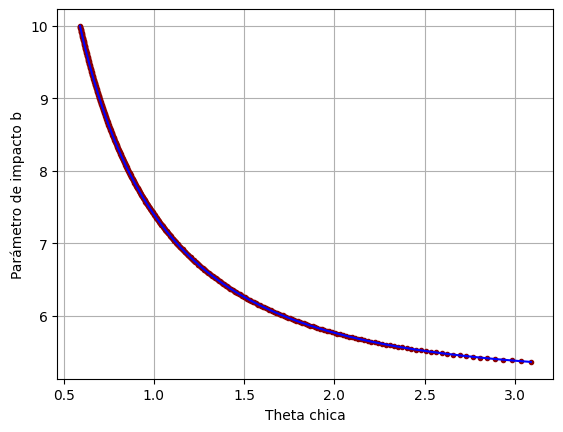

In [26]:
plt.plot(theta_values_1, b_values_1,'.',label='Datos Reales', color='darkred')
plt.plot(x_1,y_1, label = 'Ajuste realizado por mínimos cuadrádos', color = 'b')
plt.xlabel('Theta chica')
plt.ylabel('Parámetro de impacto b')
plt.grid()